<a href="https://colab.research.google.com/github/RohanPatil214/Data-Science-1-/blob/main/Cat_vs_Dog_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 46% 503M/1.06G [00:01<00:02, 294MB/s]

In [47]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [48]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [49]:
# generator

train_dataset = keras.utils.image_dataset_from_directory(
    directory ='/content/train',
    labels = 'inferred',
    label_mode ='int',
    batch_size = 32,
    image_size =(256,256)
)

validation_dataset = keras.utils.image_dataset_from_directory(
    directory ='/content/test',
    labels = 'inferred',
    label_mode ='int',
    batch_size = 32,
    image_size =(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [57]:
def process(image, label): #we defined a function name process
  image = tf.cast(image/255. ,tf.float64)
  return image,label #returning the image and label

 #we used map() to extract every time one image from train dataset and it will remove the label and send it to the above function and then it returns transformation and it will store in train and validation dataset only
train_dataset = train_dataset.map(process)
validation_dataset = validation_dataset.map(process)

In [76]:
#Now creating CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size = (3,3), padding ='valid' ,activation ='relu',input_shape = (256,256,3)))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(64,kernel_size = (3,3), padding ='valid' ,activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(128,kernel_size = (3,3), padding ='valid' ,activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [77]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_36 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_21 (Ba  (None, 125, 125, 64)      256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_34 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                     

In [78]:
#Compiling the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [79]:
#Running the model
history = model.fit(train_dataset,epochs=10,validation_data = validation_dataset)

Epoch 1/10
625/625 [==============================] - 81s 126ms/step - loss: 0.6980 - accuracy: 0.4938 - val_loss: 9.4790 - val_accuracy: 0.5000
Epoch 2/10
625/625 [==============================] - 85s 135ms/step - loss: 0.6932 - accuracy: 0.4937 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/10
625/625 [==============================] - 89s 141ms/step - loss: 0.6932 - accuracy: 0.4972 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
625/625 [==============================] - 81s 129ms/step - loss: 0.6932 - accuracy: 0.4943 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/10
625/625 [==============================] - 85s 135ms/step - loss: 0.6932 - accuracy: 0.4932 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/10
625/625 [==============================] - 79s 125ms/step - loss: 0.6932 - accuracy: 0.4933 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/10
625/625 [==============================] - 82s 131ms/step - loss: 0.6932 - accuracy: 0.4965 - val_loss: 0.6931 - val_ac

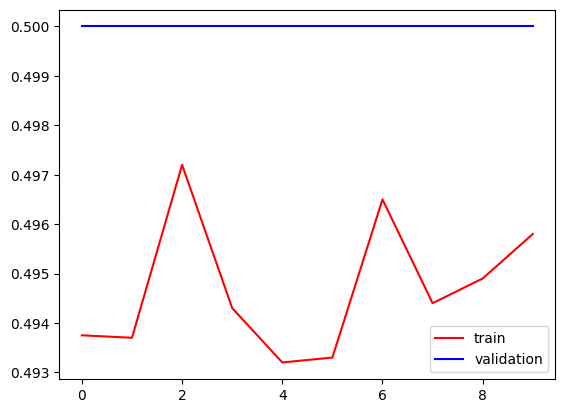

In [80]:
import matplotlib.pyplot as plt

#ploting a graph of trainnig accuracy and validation accuracy
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

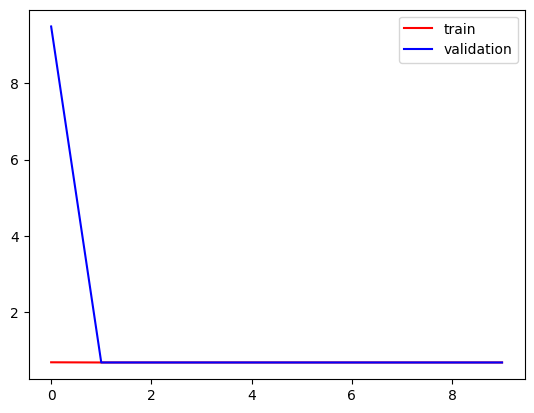

In [81]:
#plotting a graph of trainng loss and validation loss
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
"""
we have to reduce overfitting so there are some ways :

here  we have used 1)batchnormalization : It reduces internal covariate shift, accelerates training, and reduces the need for dropout, since we have used dropout to avoid overfitting
                    2) Reducing Complexity :
"""

In [82]:
import cv2

In [89]:
test_img = cv2.imread('/content/dog.jpeg')

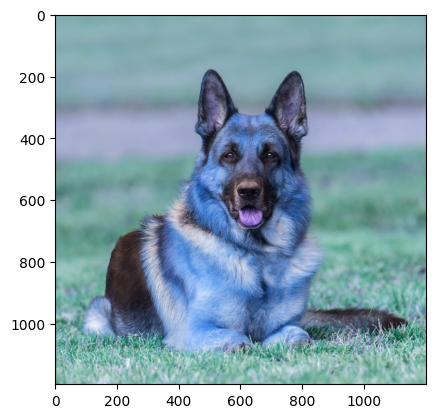

In [90]:
plt.imshow(test_img)

In [91]:
test_img.shape

(1196, 1200, 3)

In [92]:
test_img = cv2.resize(test_img,(256,256))

In [93]:
test_input = test_img.reshape((1,256,256,3))

In [94]:
model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


array([[0.]], dtype=float32)

In [95]:
test_img = cv2.imread('/content/cat.jpeg')

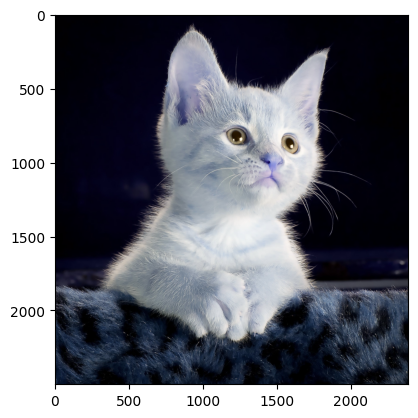

In [96]:
plt.imshow(test_img)

In [97]:
test_img.shape

(2500, 2392, 3)

In [98]:
test_img = cv2.resize(test_img,(256,256))

In [99]:
test_input = test_img.reshape((1,256,256,3))

In [100]:
model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


array([[1.]], dtype=float32)